# Thread Synchronization
Thread synchronization is defined as a mechanism which ensures that two or more concurrent thread do not simulataneously execute some particular prgram segment known as critical section.

- `Critical Section` refers to the parts of the program where the shared resource is access.

- In below example 3 threads try to access shared resource or critical section at the same time


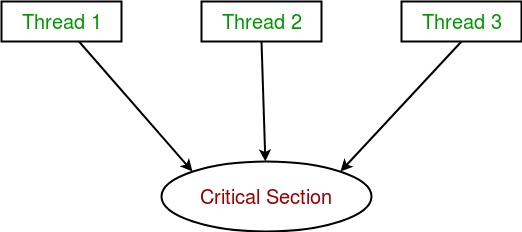


- Concurrent accesses to shared resources can read to race condition


** `What is the race condtion`**
- A race condition occurs when two or more threads can access shared data and they try to change it at the same time

In [1]:
import threading
#global variabel x
x=0

def increment():
    """
    function to increment global variablex
    """
    global x
    x+=1
    
def thread_task():
    """
    task for thread
    calls increment function 10000 times
    """
    for _ in range(10000):
        increment()

def main_task():
    global x
    #setting global variable x as zero
    x=0
    
    #creating threads
    t1=threading.Thread(target=thread_task)
    t2=threading.Thread(target=thread_task)
    
    #start threads
    t1.start()
    t2.start()
    
    #wait until threads finish our job
    
    t1.join()
    t2.join()
    
if __name__=="__main__":
    for i in range(10):
        main_task()
        print("iteration{0}:x={1}".format(i,x))
    

iteration0:x=20000
iteration1:x=20000
iteration2:x=20000
iteration3:x=20000
iteration4:x=20000
iteration5:x=20000
iteration6:x=20000
iteration7:x=20000
iteration8:x=20000
iteration9:x=20000


In [2]:
import threading 
  
# global variable x 
x = 0
  
def increment(): 
    """ 
    function to increment global variable x 
    """
    global x 
    x += 1
  
def thread_task(): 
    """ 
    task for thread 
    calls increment function 100000 times. 
    """
    for _ in range(100000): 
        increment() 
  
def main_task(): 
    global x 
    # setting global variable x as 0 
    x = 0
  
    # creating threads 
    t1 = threading.Thread(target=thread_task) 
    t2 = threading.Thread(target=thread_task) 
  
    # start threads 
    t1.start() 
    t2.start() 
  
    # wait until threads finish their job 
    t1.join() 
    t2.join() 
  
if __name__ == "__main__": 
    for i in range(10): 
        main_task() 
        print("Iteration {0}: x = {1}".format(i,x)) 

Iteration 0: x = 200000
Iteration 1: x = 200000
Iteration 2: x = 200000
Iteration 3: x = 200000
Iteration 4: x = 200000
Iteration 5: x = 200000
Iteration 6: x = 200000
Iteration 7: x = 200000
Iteration 8: x = 200000
Iteration 9: x = 200000


To prevent race conditions(where threads shared resources concurrently) python provides synchronization primitive like lock


In [3]:
import threading
counter=0
lock=threading.Lock()

def increament_counter():
    global counter
    for _ in range(1000):
        lock.acquire()
        counter+=1
        lock.release()
        
#create threads
threads=[threading.Thread(target=increament_counter) for _ in range(10)]

#start threads
for thread in threads:
    thread.start()

#wait for all thread to complete
for thread in threads:
    thread.join()

print(f"Final counter value:{counter}")

    

Final counter value:10000


In [4]:
#practical use case synchronization

import threading
import requests

def fetch_data(url):
    response=requests.get(url)
    print(f"fetched{len(response.content)}bytes from {url}")
urls=["http://example.com", "http://example.org", "http://example.net"]

#create thread for each url
threads=[threading.Thread(target=fetch_data,args=(url,))for url in urls]
# Start threads
for thread in threads:
    thread.start()

# Wait for all threads to complete
for thread in threads:
    thread.join()

print("All data fetched.")

fetched1256bytes from http://example.comfetched1256bytes from http://example.org

fetched1256bytes from http://example.net
All data fetched.


In [5]:

import threading
import time

def print_numbers():
    for i in range(1, 6):
        print(f"Number: {i}")
        time.sleep(1)

def print_letters():
    for letter in ['A', 'B', 'C', 'D', 'E']:
        print(f"Letter: {letter}")
        time.sleep(1.5)

# Create two threads
thread1 = threading.Thread(target=print_numbers)
thread2 = threading.Thread(target=print_letters)

# Start threads
thread1.start()
thread2.start()

# Wait for both threads to finish
thread1.join()
thread2.join()

print("Both threads have finished execution.")

Number: 1
Letter: A
Number: 2
Letter: B
Number: 3
Number: 4
Letter: C
Number: 5
Letter: D
Letter: E
Both threads have finished execution.
